# Simple Examples

This notebook contains two toy examples that could represent different manifolds that protein conformations lie on. Both examples assume that there is only one interesting dynamical process.

Example 1 - S shaped manifold in two dimensions. Protein trajectory follows an S, with curves and nonlinear paths.

Example 2 - Two multivariate Gaussian distributions inspired by Frank Noe. In this example, the dynamical process is orthongal to the direction of the maximum variance. In his example, tICA performed significantly better than PCA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn.decomposition import PCA, FastICA
%matplotlib inline

#### Example 1 - S shaped manifold

The dynamical process is defined by position along the curve. ISOMAP is the best performer.

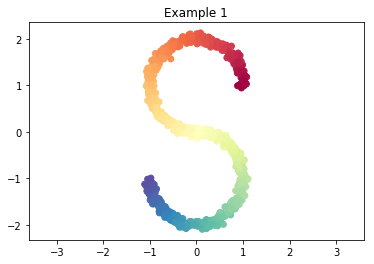

In [2]:
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
X = X[:, [0,2]] + np.random.normal(scale=0.05, size=(n_points, 2))
rand_idx = np.array(range(n_points))
np.random.shuffle(rand_idx)
X = X[rand_idx, :]; color = color[rand_idx]
plt.scatter(X[:, 0], X[:, 1] , c=color, cmap=plt.cm.Spectral); plt.axis('equal'); plt.title('Example 1')

In [4]:
# Regular PCA
pca = PCA(n_components=2)
X_pc = pca.fit_transform(X)

# ISOMAP
n_neighbors = 10
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
X_iso = pca.fit_transform(isomap.fit_transform(X))

# SE
se = manifold.SpectralEmbedding(n_neighbors=200, n_components=2)
X_se = pca.fit_transform(se.fit_transform(X))

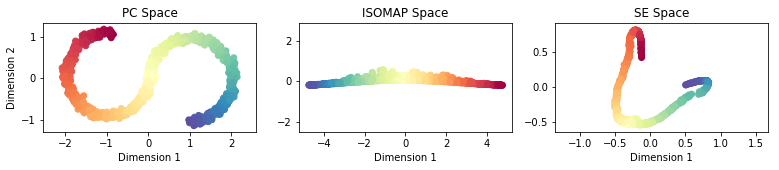

In [15]:
plt.figure(figsize=(13, 2))
plt.subplot(1, 3, 1)
plt.scatter(X_pc[:,0], X_pc[:,1], c=color, cmap=plt.cm.Spectral); plt.axis('equal');
plt.xlabel('Dimension 1');plt.ylabel('Dimension 2'); plt.title('PC Space')
plt.subplot(1, 3, 2)
plt.scatter(X_iso[:, 0], X_iso[:, 1] , c=color, cmap=plt.cm.Spectral); plt.axis('equal');
plt.xlabel('Dimension 1'); plt.title('ISOMAP Space')
plt.subplot(1, 3, 3)
plt.scatter(X_se[:, 0], X_se[:, 1] , c=color, cmap=plt.cm.Spectral); plt.axis('equal');
plt.xlabel('Dimension 1'); plt.title('SE Space'); 

#### Example 2 - Moving bivariate Gaussian

The dynamical process is the interconversion between red and purple distributions. This direction is orthogonal to the directions of the maximum variance.

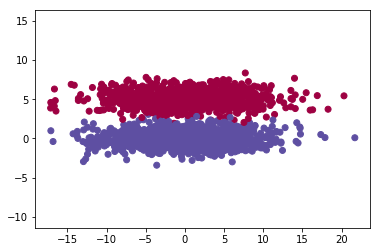

In [6]:
n_points = 1000
n_components = 2
X1 = np.random.multivariate_normal(mean=[0,0], cov=[[30,0],[0,1]], size=n_points)
X2 = np.random.multivariate_normal(mean=[0,5], cov=[[30,0],[0,1]], size=n_points)
c = np.concatenate([color[0]*np.ones(n_points), color[100]*np.ones(n_points)])
X = np.concatenate([X1, X2], axis=0)
rand_idx = np.array(range(2*n_points))
np.random.shuffle(rand_idx)
X = X[rand_idx, :]
c = c[rand_idx]
plt.scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Spectral); plt.axis('equal');

In [7]:
# Regular PCA
pca = PCA(n_components=2)
X_pc = pca.fit_transform(X)

# ISOMAP
isomap = manifold.Isomap(n_neighbors=10, n_components=2)
X_iso = pca.fit_transform(isomap.fit_transform(X))

# SE
se = manifold.SpectralEmbedding(n_neighbors=700, n_components=2)
X_se = pca.fit_transform(se.fit_transform(X))

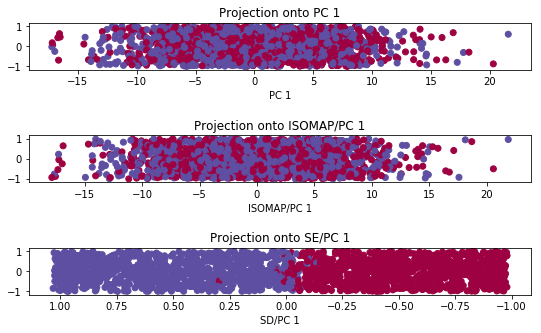

In [8]:
plt.figure(figsize=(3*3, 5))
plt.subplot(5, 1, 1)
plt.scatter(X_pc[:,0], np.random.uniform(low=-1, size=(2*n_points, 1)), c=c, cmap=plt.cm.Spectral)
plt.xlabel('PC 1'); plt.title('Projection onto PC 1')
plt.subplot(5, 1, 3)
plt.scatter(X_iso[:, 0], np.random.uniform(low=-1, size=(2*n_points, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('ISOMAP/PC 1'); plt.title('Projection onto ISOMAP/PC 1')
plt.subplot(5, 1, 5)
plt.scatter(X_se[:, 0], np.random.uniform(low=-1, size=(2*n_points, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('SD/PC 1'); plt.title('Projection onto SE/PC 1'); 
plt.gca().invert_xaxis()